### Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [5]:
file_path = 'netflix1.csv'
df = pd.read_csv(file_path)
print(df)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

### Step-by-Step Data Cleaning Process

#### 1. Check for Missing Values

In [6]:
print("Check for Missing Values")
print(df.isnull().sum()) 

Check for Missing Values
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


#### 2. Fill Missing Values

In [7]:
print("\nFill Missing Values")
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna('', inplace=True)
print("Missing values filled.")


Fill Missing Values
Missing values filled.


#### 3. Standardize the `date_added` Column

In [8]:
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    print(f"Number of invalid date entries converted: {df['date_added'].isna().sum()}")
    df['year_added'] = df['date_added'].dt.year  # Extract the year
    df['month_added'] = df['date_added'].dt.month  # Extract the month
    print("New columns 'year_added' and 'month_added' created.")

Number of invalid date entries converted: 0
New columns 'year_added' and 'month_added' created.


#### 4. Remove Duplicates

In [9]:
print("\nRemove Duplicates")
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {duplicates}")


Remove Duplicates
Number of duplicate rows removed: 0


#### 5. Drop Unnecessary Columns

In [10]:
print("\nDropping Unnecessary Columns")
columns_to_drop = ['UnnecessaryColumn1', 'UnnecessaryColumn2']  # Replace with actual column names
columns_dropped = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_dropped, inplace=True)
print(f"Columns dropped: {columns_dropped}")


Dropping Unnecessary Columns
Columns dropped: []


#### 6. Split Columns

In [14]:
if 'FullName' in df.columns:
    print("\nSplit Columns")
    df[['FirstName', 'LastName']] = df['FullName'].str.split(' ', 1, expand=True)
    print("Column 'FullName' split into 'FirstName' and 'LastName'.")

### Summary of the cleaned dataset

In [15]:
print("\n--- Summary of the Cleaned Dataset ---")
print(df.info())


--- Summary of the Cleaned Dataset ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int64         
 11  month_added   8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 892.7+ KB
None


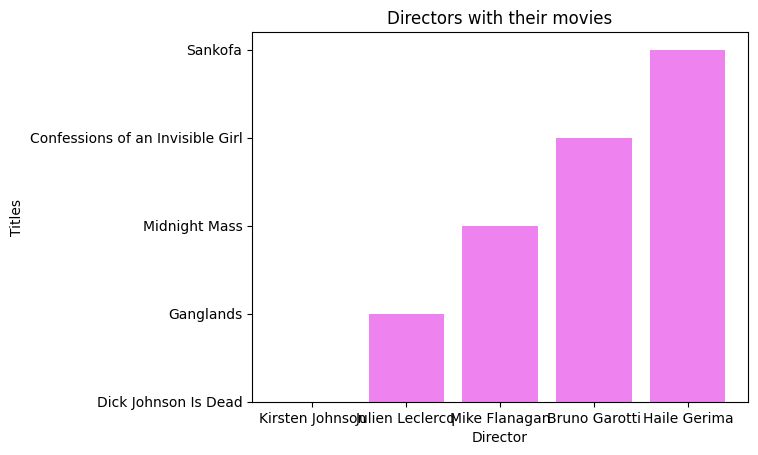

In [13]:
plt.bar(df['director'].head(), df['title'].head(), color='violet')
plt.title('Directors with their movies')
plt.xlabel('Director')
plt.ylabel('Titles')
plt.show()

### Save the cleaned dataset to a new CSV file

In [ ]:
output_file_path = 'cleaned_netflix.csv'
df.to_csv(output_file_path, index=False)
print(f"\nCleaned dataset saved as: {output_file_path}")

### Load the `cleaned_netflix` dataset

In [20]:
file_path = 'cleaned_netflix.csv'  # Replace with your file path
data = pd.read_csv(file_path)

### Data Preparation

In [ ]:
data['duration_numeric'] = pd.to_numeric(data['duration'].str.extract('(\d+)')[0], errors='coerce')

line_data = data.groupby('year_added').size()

bar_data = data['type'].value_counts()

pie_data = data['type'].value_counts()

heatmap_data = data[['release_year', 'year_added', 'month_added', 'duration_numeric']].corr()

histogram_data = data['release_year'].dropna()

### Plotting the visualizations

In [ ]:
plt.figure(figsize=(20, 15))

#### Line Chart

Text(0, 0.5, 'Count')

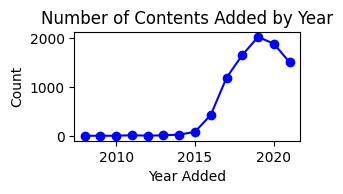

In [21]:
plt.subplot(3, 2, 1)
line_data.plot(kind='line', marker='o', color='b')
plt.title('Number of Contents Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')

#### Bar Plot

Text(0, 0.5, 'Count')

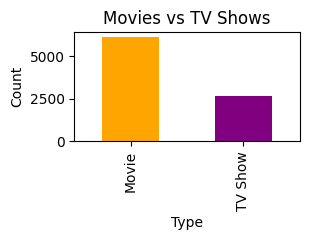

In [22]:
plt.subplot(3, 2, 2)
bar_data.plot(kind='bar', color=['orange', 'purple'])
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')

#### Pie Chart

Text(0, 0.5, '')

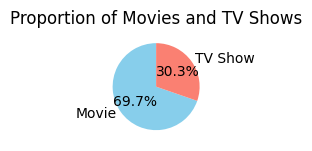

In [23]:
plt.subplot(3, 2, 3)
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proportion of Movies and TV Shows')
plt.ylabel('')

#### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

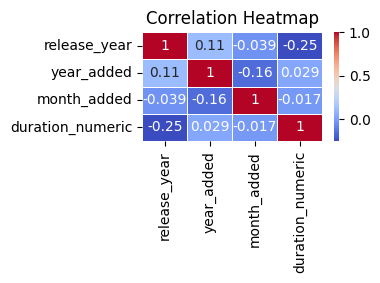

In [24]:
plt.subplot(3, 2, 4)
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

#### Histogram

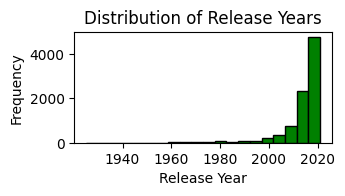

In [27]:
plt.subplot(3, 2, 5)
plt.hist(histogram_data, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()